# Bread Basket MBA

Import libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Data acquisition

In [10]:
link = 'https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/master/BreadBasket_DMS.csv'

In [11]:
data = pd.read_csv(link)
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


Data preprocessing

In [12]:
# cek tipe data dari setiap kolom
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


In [15]:
print('Unique Items: ', data['Item'].nunique())
print( '\n', data['Item'].unique())

Unique Items:  95

 ['Bread' 'Scandinavian' 'Hot chocolate' 'Jam' 'Cookies' 'Muffin' 'Coffee'
 'Pastry' 'Medialuna' 'Tea' 'NONE' 'Tartine' 'Basket' 'Mineral water'
 'Farm House' 'Fudge' 'Juice' "Ella's Kitchen Pouches" 'Victorian Sponge'
 'Frittata' 'Hearty & Seasonal' 'Soup' 'Pick and Mix Bowls' 'Smoothies'
 'Cake' 'Mighty Protein' 'Chicken sand' 'Coke' 'My-5 Fruit Shoot'
 'Focaccia' 'Sandwich' 'Alfajores' 'Eggs' 'Brownie' 'Dulce de Leche'
 'Honey' 'The BART' 'Granola' 'Fairy Doors' 'Empanadas' 'Keeping It Local'
 'Art Tray' 'Bowl Nic Pitt' 'Bread Pudding' 'Adjustment' 'Truffles'
 'Chimichurri Oil' 'Bacon' 'Spread' 'Kids biscuit' 'Siblings'
 'Caramel bites' 'Jammie Dodgers' 'Tiffin' 'Olum & polenta' 'Polenta'
 'The Nomad' 'Hack the stack' 'Bakewell' 'Lemon and coconut' 'Toast'
 'Scone' 'Crepes' 'Vegan mincepie' 'Bare Popcorn' 'Muesli' 'Crisps'
 'Pintxos' 'Gingerbread syrup' 'Panatone' 'Brioche and salami'
 'Afternoon with the baker' 'Salad' 'Chicken Stew' 'Spanish Brunch'
 'Raspberry 

In [17]:
# Cek missing value dan zeros
print(data.isnull().sum().sort_values(ascending=False))

Date           0
Time           0
Transaction    0
Item           0
dtype: int64


In [18]:
# cek nilai "NONE" pada kolom Item
print(data[data['Item']=='NONE'])

             Date      Time  Transaction  Item
26     2016-10-30  10:27:21           11  NONE
38     2016-10-30  10:34:36           15  NONE
39     2016-10-30  10:34:36           15  NONE
66     2016-10-30  11:05:30           29  NONE
80     2016-10-30  11:37:10           37  NONE
...           ...       ...          ...   ...
21108  2017-04-08  11:54:22         9590  NONE
21122  2017-04-08  12:58:25         9599  NONE
21254  2017-04-09  12:01:07         9666  NONE
21255  2017-04-09  12:04:13         9667  NONE
21266  2017-04-09  12:31:28         9672  NONE

[786 rows x 4 columns]


In [19]:
# Terdapat 786 data dengan nilai "None", maka kolom dengan nilai "None" akan dihapus

data.drop(data[data['Item']=='NONE'].index, inplace=True)

In [20]:
print(data[data['Item']=='NONE'])

Empty DataFrame
Columns: [Date, Time, Transaction, Item]
Index: []


In [23]:
# Memisahkan kolom tanggal menjadi kolom "Year", "Month", "Day"

# Year
data['Year'] = data['Date'].apply(lambda x: x.split("-")[0])
# Month
data['Month'] = data['Date'].apply(lambda x: x.split("-")[1])
# Day
data['Day'] = data['Date'].apply(lambda x: x.split("-")[2])

In [25]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20507 entries, 0 to 21292
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         20507 non-null  object
 1   Time         20507 non-null  object
 2   Transaction  20507 non-null  int64 
 3   Item         20507 non-null  object
 4   Year         20507 non-null  object
 5   Month        20507 non-null  object
 6   Day          20507 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB
None
         Date      Time  Transaction           Item  Year Month Day
0  2016-10-30  09:58:11            1          Bread  2016    10  30
1  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
2  2016-10-30  10:05:34            2   Scandinavian  2016    10  30
3  2016-10-30  10:07:57            3  Hot chocolate  2016    10  30
4  2016-10-30  10:07:57            3            Jam  2016    10  30


Data Exploration & Data Viz

In [27]:
most_sold = data['Item'].value_counts().head(20)

print('Jumlah terjualnya tiap item: \n')
print(most_sold)

Jumlah terjualnya tiap item: 

Coffee           5471
Bread            3325
Tea              1435
Cake             1025
Pastry            856
Sandwich          771
Medialuna         616
Hot chocolate     590
Cookies           540
Brownie           379
Farm House        374
Muffin            370
Alfajores         369
Juice             369
Soup              342
Scone             327
Toast             318
Scandinavian      277
Truffles          193
Coke              185
Name: Item, dtype: int64


In [28]:
transaction_count = data.groupby(by='Item')[['Transaction']].count().sort_values(by='Transaction', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

transaction_percentage = transaction_count.apply(convert_to_percentage)
transaction_percentage.head()

,Transaction
Item,
Coffee,26.678695
Bread,16.213976
Tea,6.997611
Cake,4.998293
Pastry,4.174184


Text(0.5, 1.0, 'Items Most Sold')

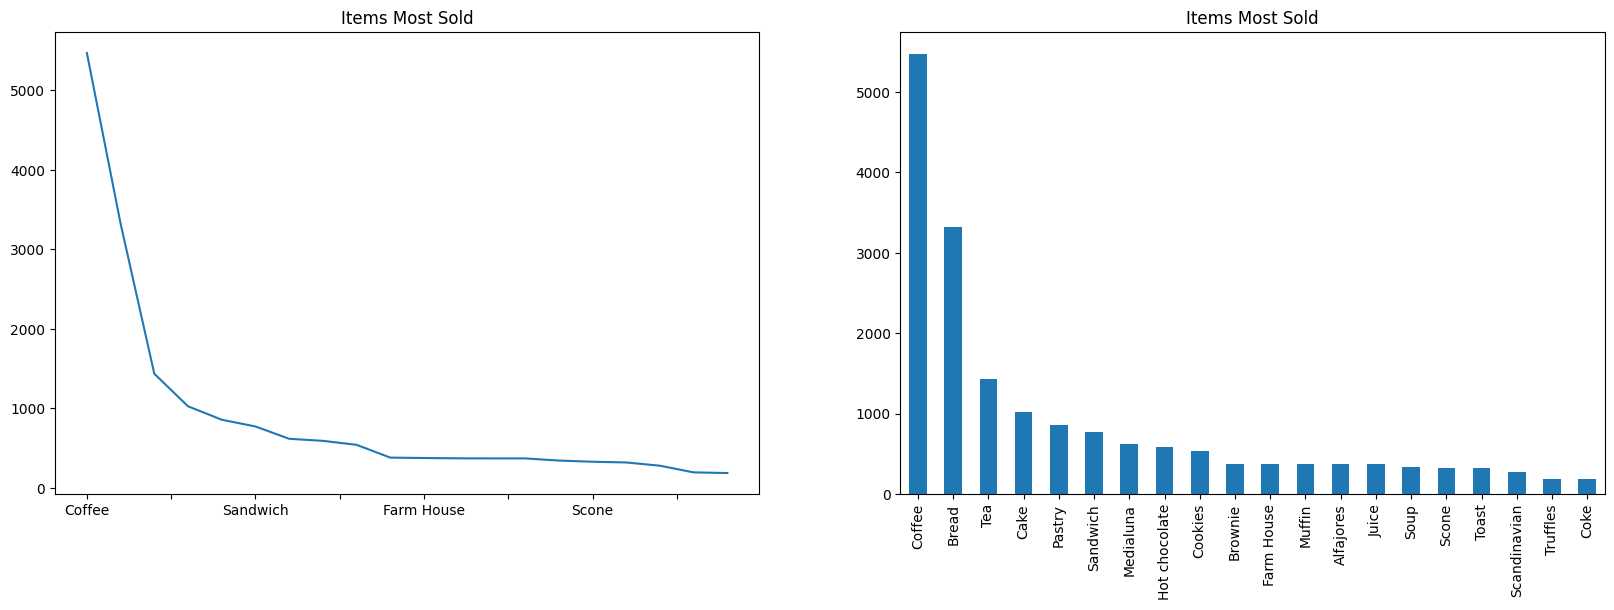

In [31]:
# visualisasikan data penjualan item terbanyak
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
most_sold.plot(kind='line')
plt.title('Items Most Sold')


plt.subplot(1,2,2)
most_sold.plot(kind='bar')
plt.title('Items Most Sold')

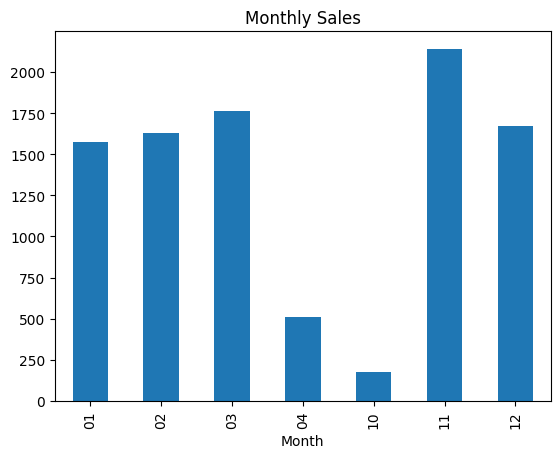

In [33]:
# bulan dengan penjualan terbanyak
data.groupby('Month')['Transaction'].nunique().plot(kind='bar', title='Monthly Sales')
plt.show()

In [35]:
print(data.groupby('Month')['Day'].nunique())

Month
01    30
02    28
03    31
04     9
10     2
11    30
12    29
Name: Day, dtype: int64


Pada Bulan 4 hanya tercatat penjualan dalam 9 hari dan pada bulan 10 hanya tercatat 2 hari

Market Basket Analysis

In [36]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

In [37]:
transaction_list = []

# Perulangan For untuk membuat daftar transaksi unik di seluruh dataset:
for i in data['Transaction'].unique():
    tlist = list(set(data[data['Transaction']==i]['Item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

9465


In [38]:
te = TransactionEncoder()
te_ary = te.fit(transaction_list).transform(transaction_list)
data2 = pd.DataFrame(te_ary, columns=te.columns_)

In [39]:
frequent_itemsets = apriori(data2, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
metrix = pd.DataFrame(rules)
metrix[['antecedents','consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False)

,antecedents,consequents,support,confidence,lift
40,(Cake),"(Tea, Coffee)",0.010037,0.096643,1.937977
39,"(Tea, Coffee)",(Cake),0.010037,0.201271,1.937977
8,(Cake),(Hot chocolate),0.011410,0.109868,1.883874
9,(Hot chocolate),(Cake),0.011410,0.195652,1.883874
11,(Tea),(Cake),0.023772,0.166667,1.604781
10,(Cake),(Tea),0.023772,0.228891,1.604781
30,(Toast),(Coffee),0.023666,0.704403,1.472431
31,(Coffee),(Toast),0.023666,0.049470,1.472431
37,(Pastry),"(Bread, Coffee)",0.011199,0.130061,1.444872
36,"(Bread, Coffee)",(Pastry),0.011199,0.124413,1.444872


 Penggunaan parameter min_threshold (nilai ambang batas yang ditentukan) dalam aturan asosiasi untuk metrik lift menjadi 1,0 karena jika kurang dari satu, maka kedua item tersebut kemungkinan tidak akan dibeli bersama. Nilai dalam data diurutkan berdasarkan keyakinan untuk melihat kemungkinan suatu barang dibeli jika item terdahulunya dibeli.

### **1. Support**
Support adalah indikasi seberapa sering kumpulan item muncul pada dataset. Berikut perhitungan nilai support :

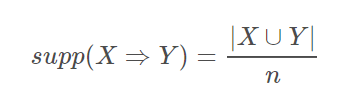

### **2. Confidence**
Confidence adalah suatu ukuran yang menunjukkan hubungan antar dua item secara conditional (berdasarkan suatu kondisi tertentu). Berikut perhitungan nilai confidence :

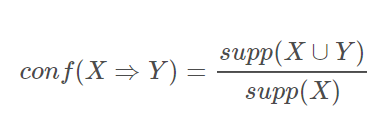

### **3. Lift**
Lift mengacu pada bagaimana peluang kedua item dibeli ketika item pertama dibeli. Berikut perhitungan nilai confidence :
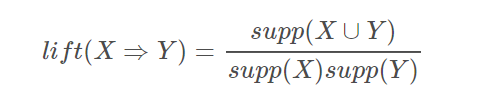